In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [4]:
train= pd.read_csv('BAC_Train.csv')
test= pd.read_csv('BAC_Test.csv')

In [5]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02/01/2013,12.05,12.15,11.90,12.03,10.16,236021400.0
1,03/01/2013,12.01,12.05,11.88,11.96,10.10,157149700.0
2,04/01/2013,11.97,12.11,11.93,12.11,10.22,132601900.0
3,07/01/2013,12.15,12.20,12.00,12.09,10.21,201403500.0
4,08/01/2013,12.09,12.10,11.89,11.98,10.11,168461100.0


In [6]:
train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,24.969563,25.233654,24.696755,24.963757,22.840207,7.619323e+07
std,9.428223,9.531041,9.318730,9.419998,9.641627,4.080707e+07
min,11.120000,11.220000,10.980000,11.030000,9.310000,1.380540e+07
25%,16.140000,16.250000,15.980000,16.112500,13.800000,4.873982e+07
50%,24.465000,24.765000,24.155000,24.470000,22.240000,6.567310e+07
75%,31.040000,31.310000,30.750000,31.077500,28.360000,9.224915e+07
max,49.910000,50.110000,49.030000,49.380000,47.950000,3.750887e+08


In [7]:
test.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
56,24/03/2023,26.60,27.29,26.32,27.14,27.14,96872700.0
57,27/03/2023,27.93,28.65,27.91,28.49,28.49,102469800.0
58,28/03/2023,28.38,28.65,27.98,28.12,28.12,63416500.0
59,29/03/2023,28.49,28.77,28.24,28.67,28.67,62666400.0
60,30/03/2023,28.92,29.06,28.11,28.30,28.30,67427100.0


In [8]:
test.describe()

,Open,High,Low,Close,Adj Close,Volume
count,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,33.100328,33.485574,32.666066,33.082131,32.934754,5.623902e+07
std,2.792243,2.785484,2.954418,2.954246,2.861801,3.982272e+07
min,26.600000,27.290000,26.320000,26.970000,26.970000,2.268110e+07
25%,32.280000,32.390000,30.310000,30.540000,30.540000,3.262060e+07
50%,34.150000,34.510000,33.830000,34.210000,34.040000,3.891740e+07
75%,35.080000,35.390000,34.790000,35.300000,35.070000,6.341650e+07
max,36.410000,37.000000,36.340000,36.770000,36.530000,2.184033e+08


In [9]:
#taking open price from data in 2d array , if we will do train.loc[:, 'open'].values it gives one d array
#which won't be considered in scaling
train_open= train.iloc[:, 1:2].values

In [10]:
train_open

array([[12.05],
       [12.01],
       [11.97],
       ...,
       [32.57],
       [32.89],
       [33.1 ]])

In [11]:
#Scaling the values between 0 to 1
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)

In [12]:
train_open_scaled[60]

array([0.02655324])

In [13]:
# Feature selection
xtrain=[]
ytrain=[]
for i in range(60,len(train_open_scaled)):
 xtrain.append(train_open_scaled[i-60:i,0])
 ytrain.append(train_open_scaled[i,0])
xtrain, ytrain = np.array(xtrain), np.array(ytrain)
#We will now reshape the data into the following format (#values, #time-steps, #1 dimensional output).

In [14]:
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [15]:
xtrain.shape

(2458, 60, 1)

In [16]:
#initialising the model 
model= Sequential()
#First Input layer and LSTM layer with 0.2% dropout
model.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1
],1)))
model.add(Dropout(0.2))
# Where:
# return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.
# Second LSTM layer with 0.2% dropout
model.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
model.add(Dropout(0.2))
#Third LSTM layer with 0.2% dropout
model.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
model.add(Dropout(0.2))
#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
model.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
model.add(Dense(units=1))
#Compiling the network
model.compile(optimizer='adam',loss='mean_squared_error')
#fitting the network
model.fit(xtrain,ytrain,batch_size=30,epochs=200)

Epoch 1/200
82/82 [==============================] - 42s 251ms/step - loss: 0.0138
Epoch 2/200
82/82 [==============================] - 29s 348ms/step - loss: 0.0043
Epoch 3/200
82/82 [==============================] - 26s 316ms/step - loss: 0.0037
Epoch 4/200
82/82 [==============================] - 18s 224ms/step - loss: 0.0035
Epoch 5/200
82/82 [==============================] - 24s 296ms/step - loss: 0.0032
Epoch 6/200
82/82 [==============================] - 17s 208ms/step - loss: 0.0033
Epoch 7/200
82/82 [==============================] - 13s 161ms/step - loss: 0.0032
Epoch 8/200
82/82 [==============================] - 14s 170ms/step - loss: 0.0027
Epoch 9/200
82/82 [==============================] - 13s 160ms/step - loss: 0.0026
Epoch 10/200
82/82 [==============================] - 14s 171ms/step - loss: 0.0025
Epoch 11/200
82/82 [==============================] - 15s 177ms/step - loss: 0.0024
Epoch 12/200
82/82 [==============================] - 15s 179ms/step - loss: 0.0021
E

82/82 [==============================] - 13s 155ms/step - loss: 6.3918e-04
Epoch 189/200
82/82 [==============================] - 12s 152ms/step - loss: 6.9629e-04
Epoch 190/200
82/82 [==============================] - 13s 160ms/step - loss: 6.5210e-04
Epoch 191/200
82/82 [==============================] - 12s 152ms/step - loss: 6.5120e-04
Epoch 192/200
82/82 [==============================] - 13s 154ms/step - loss: 6.8580e-04
Epoch 193/200
82/82 [==============================] - 13s 155ms/step - loss: 6.8270e-04
Epoch 194/200
82/82 [==============================] - 13s 154ms/step - loss: 6.8226e-04
Epoch 195/200
82/82 [==============================] - 13s 159ms/step - loss: 6.0915e-04
Epoch 196/200
82/82 [==============================] - 12s 151ms/step - loss: 6.4843e-04
Epoch 197/200
82/82 [==============================] - 12s 151ms/step - loss: 6.7674e-04
Epoch 198/200
82/82 [==============================] - 13s 161ms/step - loss: 7.0513e-04
Epoch 199/200
82/82 [==============

In [17]:
test_open= test.iloc[:, 1:2].values #taking open price
total= pd.concat([train['Open'],test['Open']],axis=0) # Concating train and test and then will take last 60 train point
test_input = total[len(total)-len(test)-60:].values
test_input= test_input.reshape(-1,1) # reshaping it to get it transformed
test_input= ss.transform(test_input)

In [18]:
xtest= []
for i in range(60,121):
 xtest.append(test_input[i-60:i,0]) #creating input for lstm prediction

In [19]:
xtest= np.array(xtest)

In [20]:
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
predicted_value= model.predict(xtest)

2/2 [==============================] - 6s 31ms/step


In [21]:
predicted_value= ss.inverse_transform(predicted_value)

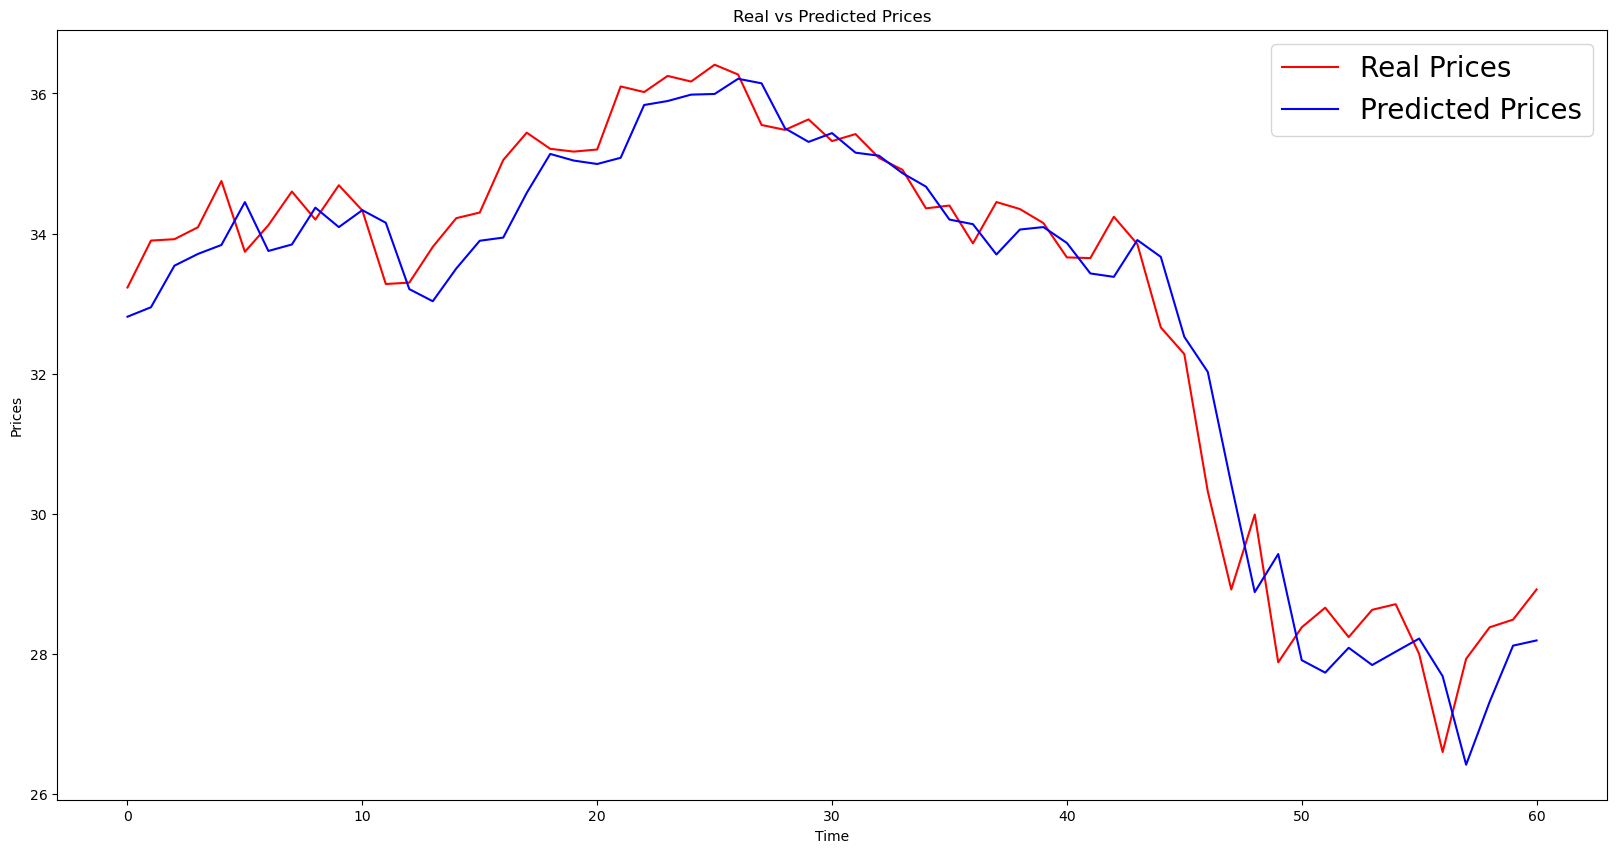

In [22]:
plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

In [46]:
# Number of time steps to predict ahead
prediction_steps = 1

In [47]:
# Initialize an array to store the predicted values
predicted_values = []

In [48]:
# Get the last 'look_back' data points from the test set as the initial input for prediction
initial_input = xtest[-1]

In [49]:
# Define the number of previous time steps to use for prediction (look_back)
look_back = 60

In [50]:
# Reshape the initial_input to match the model's input shape
initial_input = initial_input.reshape(1, look_back, 1)

In [51]:
# Make predictions for the next 'prediction_steps' time steps
for _ in range(prediction_steps):
    # Predict the next time step
    prediction = model.predict(initial_input)

1/1 [==============================] - 0s 47ms/step


In [52]:
 # Append the prediction to the list of predicted values
predicted_values.append(prediction[0, 0])

In [53]:
 # Update the initial_input for the next prediction
initial_input = np.append(initial_input[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

In [54]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(train[['Close']])

In [55]:
# Inverse transform the predicted values to get the actual stock prices
predicted_values = np.array(predicted_values)
predicted_values = scaler.inverse_transform(predicted_values.reshape(-1, 1))

In [57]:
# Display the predicted values for the next 10 time steps
print("Predicted Stock Prices for the Next 10 Time Steps:")
print(predicted_values)

Predicted Stock Prices for the Next 10 Time Steps:
[[27.909035]]
